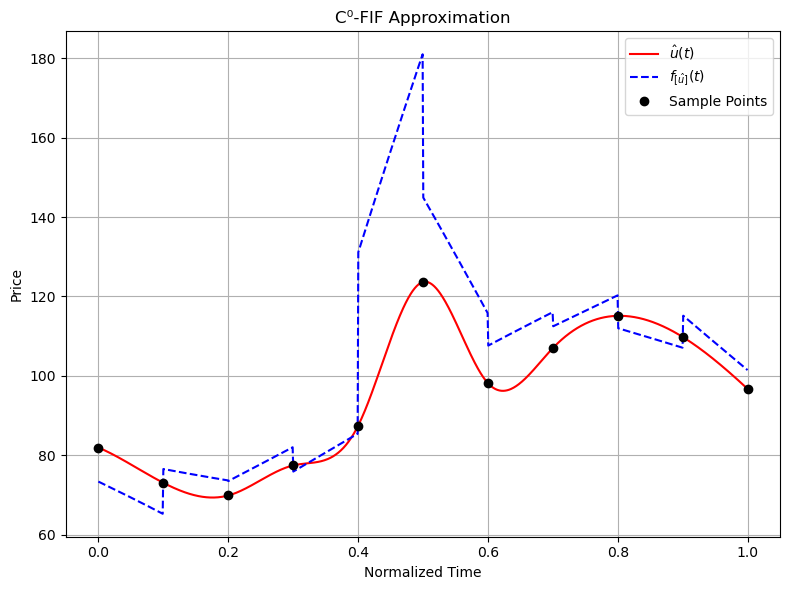

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# --------------------------
# Step 1: Smooth function ξ(t)
# --------------------------
def xi(t):
    return 3000 * (-t**3 + 3*t**4 - 3*t**5 + t**6)

# --------------------------
# Step 2: Define true û(t) (use interpolation for demo)
# --------------------------
# Sampled points (as seen in the plot)
t_sample = np.linspace(0, 1, 11)
u_sample = np.array([
    81.96, 73.08, 69.88, 77.45, 87.41, 123.63,
    98.18, 106.98, 115.12, 109.81, 96.74  # fake values; replace with your true samples
])  # from your plot or dataset

# Interpolation to simulate û(t)
u_hat_func = interp1d(t_sample, u_sample, kind='cubic', fill_value='extrapolate')

# --------------------------
# Step 3: FIF Constructor
# --------------------------
def construct_FIF(t_points, u_values, s_values, xi_func, t_eval):
    f_values = np.zeros_like(t_eval)
    N = len(t_points) - 1

    for j, t in enumerate(t_eval):
        # Find interval [t_i, t_{i+1}]
        for i in range(N):
            if t_points[i] <= t <= t_points[i + 1]:
                a_i = t_points[i + 1] - t_points[i]
                x = (t - t_points[i]) / a_i  # scaled to [0,1]

                # Linear base interpolation
                u_linear = (1 - x) * u_values[i] + x * u_values[i + 1]
                correction = s_values[i] * (u_linear - xi_func(t))
                f_values[j] = u_linear + correction
                break

    return f_values

# --------------------------
# Step 4: C⁰-FIF Parameters
# --------------------------
s_C0 = [-0.1046, 0.0461, 0.044, -0.0149, 0.3377, 0.1255, 0.0673, 0.0405, -0.0243, 0.0488]
d_C0 = 0.0513

# --------------------------
# Step 5: Evaluate
# --------------------------
t_eval = np.linspace(0, 1, 1000)
u_hat_vals = u_hat_func(t_eval)
fif_vals = construct_FIF(t_sample, u_sample, s_C0, xi, t_eval)

# --------------------------
# Step 6: Plotting
# --------------------------
plt.figure(figsize=(8, 6))
plt.plot(t_eval, u_hat_vals, 'r-', label=r'$\hat{u}(t)$')
plt.plot(t_eval, fif_vals, 'b--', label=r'$f_{[\hat{u}]}(t)$')
plt.plot(t_sample, u_sample, 'ko', label='Sample Points')
plt.xlabel("Normalized Time")
plt.ylabel("Price")
plt.title("C⁰-FIF Approximation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
